<a href="https://colab.research.google.com/github/chelseaangeles/programming-assignment-5/blob/main/Programming_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programming Assignment 5: Cybersecurity Attack Classification Using Random Forest**
> Group Members:
1. Angeles, Chelsea R.
2. Soriano, Adelyn Joyce S.



You are a cybersecurity intern at SecureNet Corp. The company has been experiencing various network security breaches, and your team is tasked with developing a machine learning model to classify different types of cyberattacks.

The senior engineer hands you a dataset of simulated network traffic and says, "*We need a robust classifier to detect attacks like DDoS, Botnet, and others. Use your ML skills to build this. Oh, and don’t forget— real-world data is messy; make sure your model can handle it.*"

Your goal is to preprocess the data and train a Random Forest classifier to identify the type of attack.

### **Dataset**

---

The dataset cyber_attacks.csv contains the following features:

*   protocol_type: Protocol (0: TCP, 1: UDP, 2: ICMP).
*   duration: Connection duration (seconds).
*   src_bytes: Bytes sent from source.
*   dst_bytes: Bytes sent to destination.
*   num_packets: Number of packets transmitted.
*   num_connections: Number of connections.
*   attack_type: Type of attack (Normal, Botnet, DDoS, PortScan, Phishing).

Download the dataset here: [cyber_attacks.csv](https://tupmla-my.sharepoint.com/:x:/g/personal/timothy_amado_tup_edu_ph/EYN4_5H6Y7pLmDe0AwAaXFMBSGPl6sOShjRFrQOajrlGVw?e=0hJChJ).

# **General Guidelines**

---

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree

## **1. Load the dataset and perform exploratory data analysis**
Loading the dataset and performing initial data exploration to understand its structure, identify missing values, and analyze the distribution of features and target variables.


*   Load the dataset using Google drive mounting
*   Check for missing values and summary statistics
*   Visualize the distribution of the target variable `attack_type` to understand class balance





In [ ]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = "/content/drive/My Drive/Colab Notebooks/Prog-Assignment-5/cyber_attacks.csv"
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Prog-Assignment-5/cyber_attacks.csv")

# Display the first few rows
print(df.head())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   protocol_type   duration    src_bytes   dst_bytes  num_packets  \
0              1  43.418651  1701.411601  201.794741           42   
1              1   8.587924   409.971403  710.745376           17   
2              1   4.386891   418.478693  559.457816           17   
3              0        NaN          NaN         NaN           11   
4              0   1.061892   494.253699  572.459614           11   

   num_connections attack_type  
0               15      Botnet  
1                6      Normal  
2                5      Normal  
3                3      Normal  
4                3      Normal  

Missing values:
 protocol_type        0
duration           500
src_bytes          500
dst_bytes          500
num_packets          0
num_connections      0
attack_type          0
dtype: int64


Missing values are found in `duration`, `src_bytes`, `dst_bytes`

       protocol_type      duration     src_bytes     dst_bytes   num_packets  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean        0.506100     84.035480    980.541438   1189.719031     93.993200   
std         0.673653    183.321899   1398.500579   1489.911321    147.278664   
min         0.000000      0.000871      0.338156      0.019126      2.000000   
25%         0.000000      4.594264    286.660390    279.330509     14.000000   
50%         0.000000      7.555148    522.731289    631.511165     19.000000   
75%         1.000000     78.939634    877.096434   1189.719031    100.000000   
max         2.000000   1220.385081   8000.795141   7603.412219    582.000000   

       num_connections  attack_type  
count     10000.000000  10000.00000  
mean         49.757500      2.00000  
std          94.172701      1.00005  
min           0.000000      0.00000  
25%           2.000000      2.00000  
50%           5.000000      2.00000  
75%          

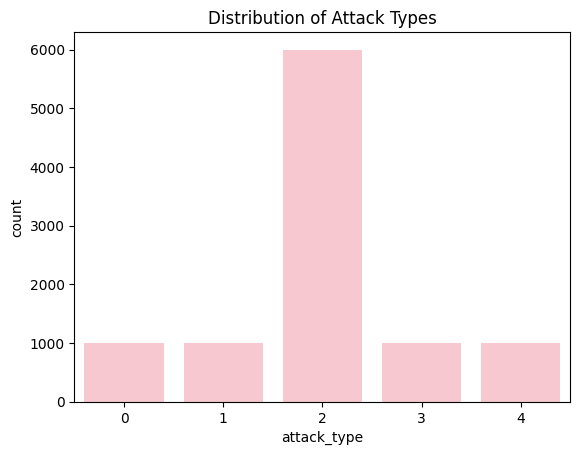

In [ ]:
# Summary statistics
print(df.describe())

# Distribution of attack types
sns.countplot(x='attack_type', color='pink', data=df)
plt.title('Distribution of Attack Types')
plt.show()

## **2. Perform data preprocessing**
Prepare the data for machine learning by handling missing values, encoding categorical features, and splitting the dataset into training and testing sets.

*   Handle missing values in numerical features using `SimpleImputer`
*   Encode categorical features (e.g., `protocol_type`) using `LabelEncoder`
*   Split the dataset into features (`X`) and target (`y`), and then into training and testing sets using `train_test_split`





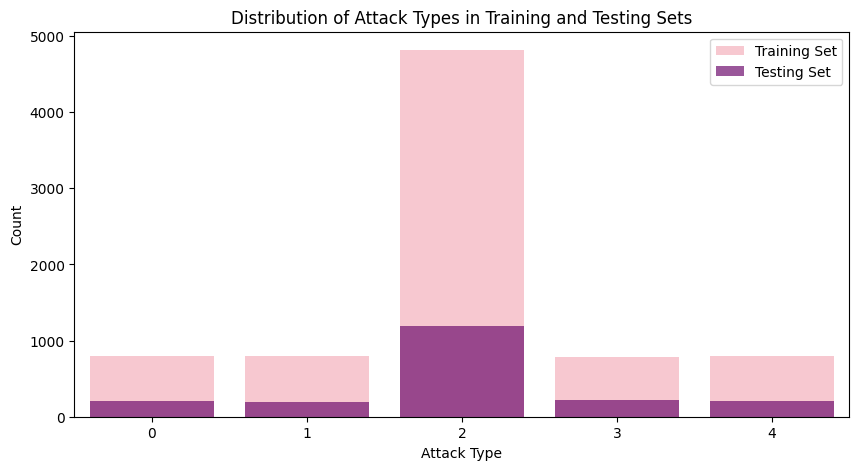

In [ ]:
# Handle missing values in numerical features
imputer = SimpleImputer(strategy='mean')
df[['duration', 'src_bytes', 'dst_bytes', 'num_packets', 'num_connections']] = imputer.fit_transform(df[['duration', 'src_bytes', 'dst_bytes', 'num_packets', 'num_connections']])

# Encode the protocol_type feature
label_encoder = LabelEncoder()
df['protocol_type'] = label_encoder.fit_transform(df['protocol_type'])

# Encode the attack_type feature
df['attack_type'] = label_encoder.fit_transform(df['attack_type'])

# Split the data into features and target
X = df.drop('attack_type', axis=1)
y = df['attack_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to visualize the distribution
train_distribution = y_train.value_counts().reset_index()
train_distribution.columns = ['attack_type', 'train_count']

test_distribution = y_test.value_counts().reset_index()
test_distribution.columns = ['attack_type', 'test_count']

# Merge the two DataFrames
distribution = pd.merge(train_distribution, test_distribution, on='attack_type', how='outer').fillna(0)

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x='attack_type', y='train_count', data=distribution, color='pink', label='Training Set')
sns.barplot(x='attack_type', y='test_count', data=distribution, color='purple', label='Testing Set', alpha=0.7)
plt.title('Distribution of Attack Types in Training and Testing Sets')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.legend()
plt.show()

## **3. Train a Random Forest Classifier using the preprocessed data to train the model**
Build and train a Random Forest model using the preprocessed data. Use a pipeline to streamline the process of scaling and training.

*   Create a pipeline with `StandardScaler` (for scaling features) and `RandomForestClassifier`
*   Train the model on the training data using `pipeline.fit()`



In [ ]:
# Create a pipeline with StandardScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

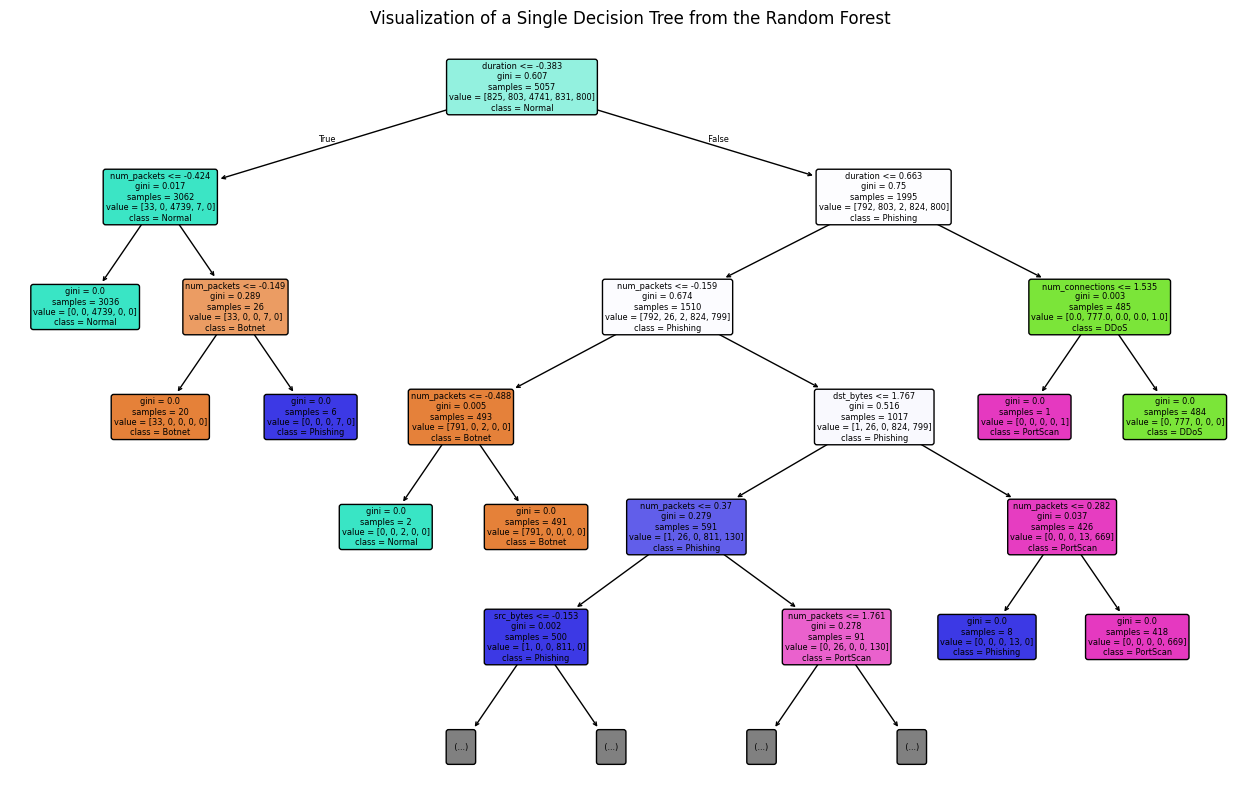

In [ ]:
# Extract one tree from the Random Forest
rf_model = pipeline.named_steps['classifier']  # Access the Random Forest model from the pipeline
single_tree = rf_model.estimators_[0]  # Select the first tree in the forest

# Plot the tree
plt.figure(figsize=(16, 10))
plot_tree(single_tree,
          feature_names=X.columns,  # Use feature names for better interpretation
          class_names=label_encoder.classes_,  # Use class names for better interpretation
          filled=True,  # Fill nodes with colors to indicate class
          rounded=True,  # Use rounded corners for nodes
          max_depth=5)  # Limit the depth of the tree for readability
plt.title("Visualization of a Single Decision Tree from the Random Forest")
plt.show()

The first decision tree is extracted for visualization to analyze how the model makes a prediction

## **4. Perform feature importance analysis**

Analyze which features contribute most to the model's predictions. This helps in understanding the model and optimizing performance.
* Extract feature importance values from the trained Random Forest model.
* Visualize the importance of each feature using a bar chart.

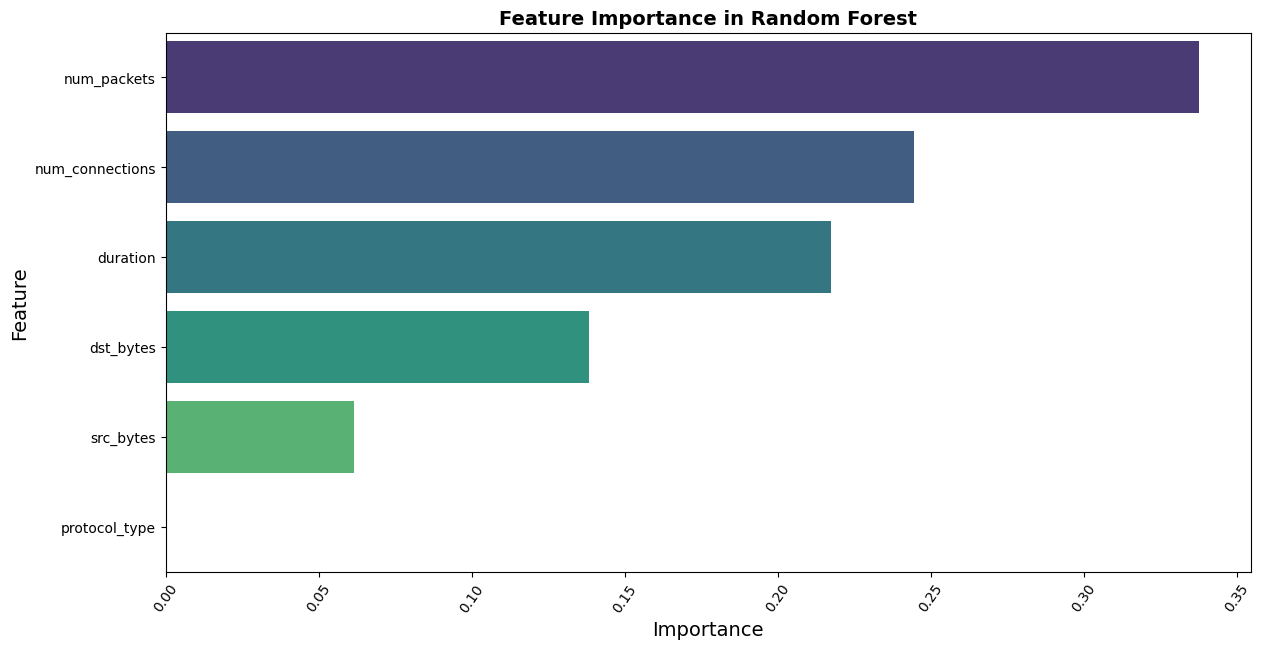

In [ ]:
# Extract feature importances from the trained Random Forest model
feature_importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(14, 7))
sns.barplot(
    x=feature_importance_df['Importance'],
    y=feature_importance_df['Feature'],
    hue=feature_importance_df['Feature'],
    palette='viridis',
    dodge=False
)

# Add labels and title
plt.title("Feature Importance in Random Forest", fontsize=14, fontweight='bold')
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.xticks(rotation=55)
plt.show()

## **5. Evaluate the model performance and report precision, recall, and F1-score**
Assess the model’s accuracy and effectiveness in predicting attack types.
* Predict the attack types using the test dataset.
* Generate a classification report to show precision, recall, and F1-score.
* Create a confusion matrix to visualize correct and incorrect predictions.

,precision,recall,f1-score,support
0,1.000000,0.851485,0.919786,202.000000
1,1.000000,1.000000,1.000000,197.000000
2,1.000000,1.000000,1.000000,1185.000000
3,0.877049,1.000000,0.934498,214.000000
4,1.000000,1.000000,1.000000,202.000000
accuracy,0.985000,0.985000,0.985000,0.985000
macro avg,0.975410,0.970297,0.970857,2000.000000
weighted avg,0.986844,0.985000,0.984890,2000.000000


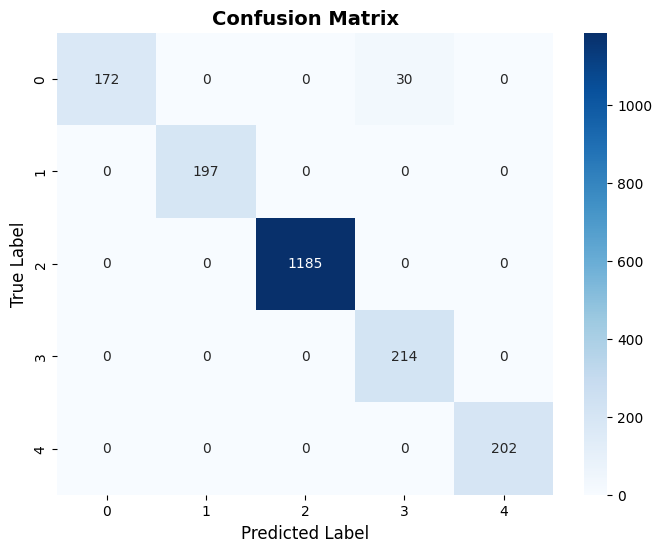

In [ ]:
# Predict on the test set
y_pred = pipeline.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Display classification report in a readable format
display(report_df.style.set_properties(**{'background-color': 'lightyellow', 'color': 'black'}))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Add labels and title
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.show()

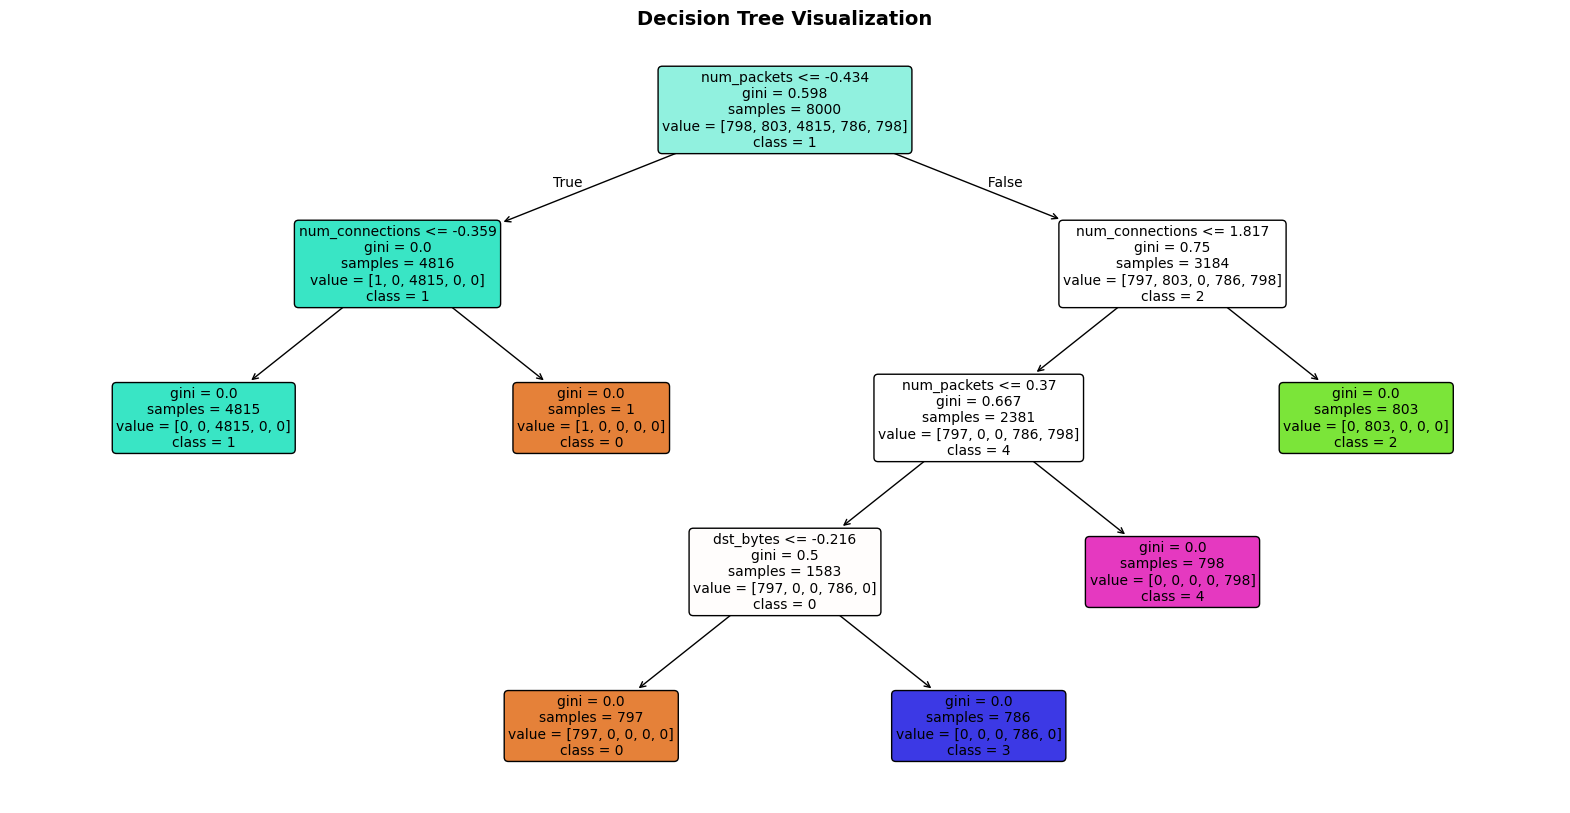

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_pipeline.named_steps['classifier'],
          filled=True,
          feature_names=X.columns,
          class_names=[str(cls) for cls in y.unique()],
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization", fontsize=14, fontweight='bold')
plt.show()

# **Guide Questions**

---

**1. Preprocessing**
* How did you handle missing values in numerical features?
  - *Answer: Missing values in numerical features were handled using the SimpleImputer with the strategy set to 'mean'. This replaces missing values with the mean of the respective feature.*
  
* Why is there a need to encode protocol_type feature, and which encoding method can be used?
  - *Answer: The `protocol_type` feature is categorical, and machine learning models require numerical input. We used `LabelEncoder` to convert the categorical values into numerical labels.*

**2. Model Training**
* How did you address class imbalance in the dataset?
  - *Answer: Class imbalance can be addressed using techniques like oversampling the minority class, undersampling the majority class, or using class weights in the Random Forest classifier. In this case, we did not explicitly address class imbalance, but it can be done using the class_weight parameter in RandomForestClassifier.*

* What hyperparameters of the Random Forest did you tune, and why?
  - *Answer: Common hyperparameters to tune include n_estimators, max_depth, and min_samples_split. These parameters control the complexity of the model and can help prevent overfitting.*

* Why is a pipeline useful for this task?
  - *Answer: A pipeline is useful because it ensures that the same preprocessing steps are applied to both the training and testing data. It also simplifies the code and makes it easier to deploy the model.*
  

**3. Evaluation**
* Why is accuracy alone insufficient to evaluate this model?
  - *Answer: Accuracy can be misleading, especially when dealing with imbalanced datasets. In cybersecurity, some attack types are rare compared to others. A model might achieve high accuracy by simply predicting the most common class while failing to detect the rare ones. Hence, metrics like precision, recall, and F1-score give a better understanding of how well the model performs across all classes, not just the majority.*

* Which attack type was hardest to classify, and why might this be?
  - *Answer: The hardest attack type to classify is usually the one with the lowest recall or F1-score in the classification report. This often happens with rare attacks because the model has fewer examples to learn from, which makes it harder to recognize them accurately.*
  
* How would you improve the model’s performance on minority classes?
  - *Answer: We can use techniques like oversampling (creating more examples of rare attacks), adjusting class weights to prioritize minority classes, or collecting more data for underrepresented attack types. These methods help the model learn better patterns for rare attacks.*

**4. Interpretation**
* Which features were most important for classification? Does this align with real-world attack patterns?
  - *Answer: Features like `duration`, `src_bytes`, and `dst_bytes` are often the most important because they reflect unusual traffic patterns, which are common in cyberattacks. This aligns with real-world patterns, as many attacks involve abnormal network activity, such as high traffic volumes or long connections.*

* How would you explain the model’s decision-making process to a non-technical team?
  - *Answer: To explain the model, we can use visuals like decision trees and feature importance charts. The decision tree shows step-by-step how the model decides if an attack is happening, while the feature importance chart highlights the key factors (like traffic volume or connection duration) it relies on most. These visuals make the model’s logic easy to understand without technical jargon.*

**5. Application**
* What steps would you take to deploy this model in a real-time network monitoring system?
  - *Answer: To deploy the model, it would need to be integrated into the network monitoring system. This could involve setting up a server to run the model, preprocessing incoming network traffic data, and making real-time predictions.*

* How would you handle new attack types not present in the training data?
  - *Answer: Handling new attack types requires continuous monitoring and updating of the model. This could involve retraining the model with new data, using anomaly detection techniques, or implementing a feedback loop where new attacks are labeled and added to the training set.*